In [319]:
import os
import torch
import pickle
import argparse
import h5py
from torch.autograd import Variable
from model import NetD, NetG
from PIL import Image, ImageDraw
import torchvision.transforms as transforms
from misc import get_logger, ges_Aonfig

In [315]:
from parse_metadata import EcommerceDataParser

In [207]:
def concat_image(images,nrows, ncols):
    width = 128
    height = 128
    
    background = Image.new('RGB',(128*ncols, 128*nrows), (255, 255, 255, 255))
    bg_w, bg_h = background.size
    
    for i,image in enumerate(images):
    #print(i)
        img = image
        draw = ImageDraw.Draw(img, "RGB")
        #font = ImageFont.truetype("/Library/Fonts/Arial.ttf",50)
        #draw.text((50, 50), str(i),)
        start_X = i%ncols * 128
        start_Y = i//ncols * 128
        offset = (start_X,start_Y,start_X+width,start_Y+height)
        background.paste(img,offset)
        
    return background

In [208]:
h = h5py.File('./data/datasets/products/train/data.h5py','r')['train']

In [209]:
for i in h.keys():
    print(i)

asin
cate
docvec


In [210]:
h['asin'][:10]

array([b'001212835X.jpg', b'001212835X.jpg', b'0737104473.jpg',
       b'0737104473.jpg', b'9177123026.jpg', b'9177123026.jpg',
       b'9177124200.jpg', b'9177124200.jpg', b'9178883970.jpg',
       b'9177124197.jpg'], dtype='|S14')

In [211]:
h['cate'][:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [414]:
checkpoint_path = 'outputs/netg_checkpoints/netG__epoch_130.pth'

In [415]:
n_z = 100
n_l = 100
n_t = 500
n_c = 64
netG = NetG(n_z=n_z, n_l=n_l, n_c=n_c, n_t=n_t)
netG.load_state_dict(torch.load(checkpoint_path, map_location=lambda storage, loc: storage))

In [416]:
transform = transforms.Compose([transforms.ToPILImage(),])

In [417]:
netG.zero_grad()

### train sample

In [431]:
n= 1000
images = []
real_images = []
imgdir = 'data/datasets/products/images'
for index in range(n,n+10):
    asin = h['asin'][index].decode('utf-8')
    real_images.append(Image.open(os.path.join(imgdir,asin)).resize((128,128)))
    caption = Variable(torch.from_numpy(h['docvec'][index].reshape(1,-1)))
    noise = Variable(torch.randn(1, 100)) # create random noise
    noise.data.normal_(0,1) # normalize the noise
    fake = netG(noise, caption)
    img = transform(fake[0].data)
    images.append(img)

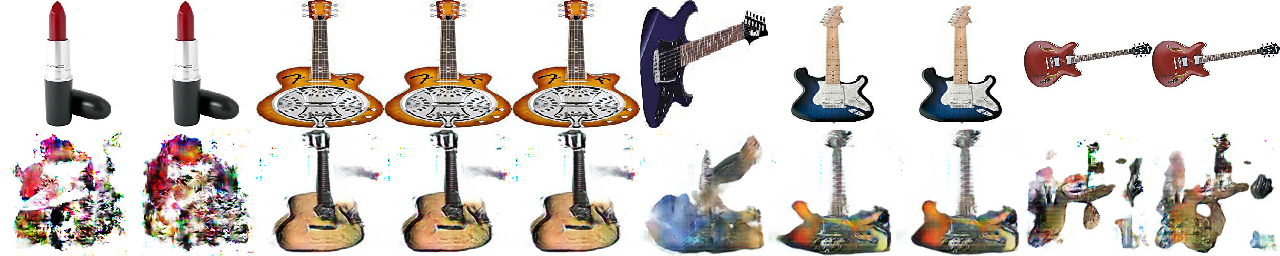

In [432]:
concat_image(real_images + images,2,len(images))

### val sample

### test sample

In [420]:
config = ges_Aonfig('configs/config-real.yaml')['PARSEMETA']
parser = EcommerceDataParser(config, use=True)

[INFO    ] 2019-02-25 12:56:58 [parse_metadata.py] [load_spm:50] USE MODE LOAD SPM
[INFO    ] 2019-02-25 12:56:58 [parse_metadata.py] [load_spm:57] USE MODE LOAD SPM DONE: 0 sec
[INFO    ] 2019-02-25 12:56:58 [parse_metadata.py] [load_doc2vec_model:292] USE MODE LOAD DOC2VEC
[INFO    ] 2019-02-25 12:56:58 [parse_metadata.py] [get_doc_list:266] lamps shades table lamps tools home improvement lighting ceiling fans everett's cottage table lamp ['▁lamps', '▁shades', '▁table', '▁lamps', '▁tools', '▁home', '▁improvement', '▁lighting', '▁ceiling', '▁fans', '▁everett', "'", 's', '▁cottage', '▁table', '▁lamp'] [15, 52, 11, 15, 54, 16, 56, 38, 57, 55, 20346, 5, 6, 2256, 11, 62] 0 sec
[INFO    ] 2019-02-25 12:56:59 [parse_metadata.py] [get_doc_list:266] revlon colorstay soft smooth lipcolor natural cashmere 200 11 oz 3 2 g revlon lipstick beauty makeup lips ['▁revlon', '▁colorstay', '▁soft', '▁smooth', '▁lipcolor', '▁natural', '▁cashmere', '▁200', '▁11', '▁oz', '▁3', '▁2', '▁g', '▁revlon', '▁lips

[INFO    ] 2019-02-25 12:57:17 [parse_metadata.py] [get_doc_list:266] women wool blends clothing shoes jewelry coats jackets clothing 519362 lane crawford button front military inspired wool coat with button down collar in gray size s ['▁women', '▁wool', '▁blends', '▁clothing', '▁shoes', '▁jewelry', '▁coats', '▁jackets', '▁clothing', '▁519362', '▁lane', '▁crawford', '▁button', '▁front', '▁military', '▁inspired', '▁wool', '▁coat', '▁with', '▁button', '▁down', '▁collar', '▁in', '▁gray', '▁size', '▁s'] [4, 82, 105, 1, 2, 3, 17, 18, 1, 13100, 2116, 5629, 325, 384, 328, 515, 82, 96, 30, 325, 87, 280, 102, 313, 50, 182] 1 sec
[INFO    ] 2019-02-25 12:57:19 [parse_metadata.py] [get_doc_list:266] handbags wallets shoulder bags clothing shoes jewelry women i love lucy signature product women's i love lucytm collage medium tote lu613 i love lucy ['▁handbags', '▁wallets', '▁shoulder', '▁bags', '▁clothing', '▁shoes', '▁jewelry', '▁women', '▁i', '▁love', '▁lucy', '▁signature', '▁product', '▁women',

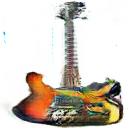

In [424]:
text = 'guitars'
caption = Variable(torch.from_numpy(parser.text2vec(text).reshape(1,-1)))
noise = Variable(torch.randn(1, 100)) # create random noise
noise.data.normal_(0,1) # normalize the noise
fake = netG(noise, caption)
img = transform(fake[0].data)
img

In [370]:
import pandas as pd

In [250]:
df = pd.read_csv('./data/datasets/products/products.tsv',sep='\t',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184181 entries, 0 to 184180
Data columns (total 4 columns):
0    184181 non-null object
1    184181 non-null object
2    184181 non-null object
3    184181 non-null object
dtypes: object(4)
memory usage: 5.6+ MB


In [252]:
s = df[1].value_counts()
s#s[(s>12000) & (s < 13500)]

Clothing,Shoes&Jewelry>Women>Clothing>Coats&Jackets                   18614
Clothing,Shoes&Jewelry>Girls>Clothing>Dresses                         17332
Clothing,Shoes&Jewelry>Women>Shoes>Boots                              16274
Beauty>Makeup>Lips>Lipstick                                           16028
Clothing,Shoes&Jewelry>Women>Accessories>Hats&Caps                    14628
Clothing,Shoes&Jewelry>Women>Handbags&Wallets>ShoulderBags            14463
Clothing,Shoes&Jewelry>N>Nike                                         14359
Tools&HomeImprovement>Lighting&CeilingFans>Lamps&Shades>TableLamps    12554
Clothing,Shoes&Jewelry>Women>Clothing>Skirts                          11856
Automotive>Motorcycle&Powersports>ProtectiveGear>Helmets              11771
Clothing,Shoes&Jewelry>adidas                                         10266
Home&Kitchen>Furniture>LivingRoomFurniture>Tables                     10159
MusicalInstruments>Guitars>ElectricGuitars>SolidBody                   6070
MusicalInstr

In [253]:
sub = df[df[1] == 'Tools&HomeImprovement>Lighting&CeilingFans>Lamps&Shades>TableLamps']
imgdir = 'data/datasets/products/images/'
images = []
sub.info()
for i, row in sub.iterrows():
    asin = row[0]
    title = row[2]
    print(i, asin, title)
    try:
        images.append(Image.open( imgdir+ asin +'.jpg').resize((128,128)))
    except:
        pass
    if len(images) == 100:
        break

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12554 entries, 0 to 183875
Data columns (total 4 columns):
0    12554 non-null object
1    12554 non-null object
2    12554 non-null object
3    12554 non-null object
dtypes: object(4)
memory usage: 490.4+ KB
0 001212835X lamps shades table lamps tools home improvement lighting ceiling fans everett's cottage table lamp
1 001212835X everett's cottage table lamp lamps shades table lamps tools home improvement lighting ceiling fans
4 9177123026 ikea ljus aring s uv aring s table lamp blue tools home improvement lamps shades lighting ceiling fans table lamps
5 9177123026 tools home improvement lamps shades lighting ceiling fans table lamps ikea ljus aring s uv aring s table lamp blue
6 9177124200 ikea lamps shades table lamps tools home improvement lighting ceiling fans ikea 500 291 62 alang nickel plated table lamp white
7 9177124200 ikea ikea 500 291 62 alang nickel plated table lamp white lamps shades table lamps tools home improvement l

In [254]:
index = 0
showimages = images[index:index+10]

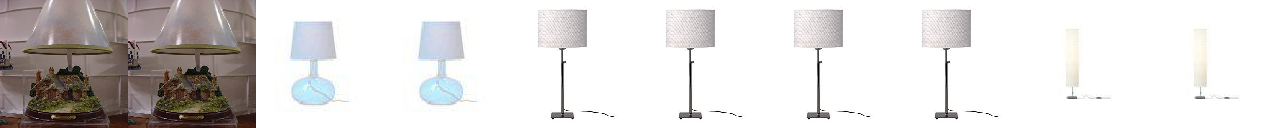

In [255]:
concat_image(showimages,1,len(showimages))

# cate select

In [ ]:
# ,Clothing,Shoes&Jewelry>adidas
# ,Home&Kitchen>Furniture>LivingRoomFurniture>Tables
# ,Clothing,Shoes&Jewelry>Women>Clothing>Coats&Jackets
# ,Beauty>Makeup>Lips>Lipstick
# ,Clothing,Shoes&Jewelry>Women>Shoes>Boots
# ,Clothing,Shoes&Jewelry>Girls>Clothing>Dresses
# ,Clothing,Shoes&Jewelry>Women>Accessories>Hats&Caps
# ,Clothing,Shoes&Jewelry>Women>Clothing>Skirts
# ,Clothing,Shoes&Jewelry>Women>Handbags&Wallets>ShoulderBags
# ,Automotive>Motorcycle&Powersports>ProtectiveGear>Helmets
# ,Clothing,Shoes&Jewelry>N>Nike
# ,Tools&HomeImprovement>Lighting&CeilingFans>Lamps&Shades>TableLamps